In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/" , one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
total_epoch = 100
batch_size = 100
learning_rate = 0.0002
n_hidden = 256
n_input = 28*28
n_noise = 128


In [4]:
aa = mnist.train.next_batch(batch_size)

In [12]:
aa[0].shape

(100, 784)

In [5]:
X = tf.placeholder(tf.float32 , [None , n_input])
Z = tf.placeholder(tf.float32 , [None , n_noise])

In [8]:
g_W1 = tf.Variable(tf.random_normal([n_noise,n_hidden] , stddev=0.01))
g_b1 = tf.Variable(tf.zeros([n_hidden]))
g_W2 = tf.Variable(tf.random_normal([n_hidden,n_input] , stddev=0.01))
g_b2 = tf.Variable(tf.zeros([n_input]))

In [9]:
def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z , g_W1) + g_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden , g_W2)+g_b2)
    return output

In [10]:
d_W1 = tf.Variable(tf.random_normal([n_input,n_hidden] , stddev=0.01))
d_b1 = tf.Variable(tf.zeros([n_hidden]))
d_W2 = tf.Variable(tf.random_normal([n_hidden,1] , stddev=0.01))
d_b2 = tf.Variable(tf.zeros([1]))

In [11]:
def discriminator(inputs):
    hidden = tf.nn.relu(tf.matmul(inputs , d_W1) + d_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden , d_W2)+d_b2)
    return output

In [12]:
def get_noise(batch_size , n_noise):
    return np.random.normal(size=(batch_size , n_noise))

In [13]:
G = generator(Z)
D_generate = discriminator(G)
D_real = discriminator(X)

In [15]:
loss_D = tf.reduce_mean(tf.log(D_real))+tf.reduce_mean(tf.log(1-D_generate))

In [16]:
loss_G = tf.reduce_mean(tf.log(D_generate))

In [17]:
d_var_list = [d_W1 , d_b1 , d_W2 , d_b2]
g_var_list = [g_W1 , g_b1 , g_W2 , g_b2]

In [18]:
train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D , var_list=d_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G , var_list=g_var_list)

In [20]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D , loss_val_G = 0,0

img_contents = dict()

In [27]:
for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs , batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)
        _ , loss_val_D = sess.run([train_D,loss_D],feed_dict={X:batch_xs , Z:noise})
        _ , loss_val_G = sess.run([train_G,loss_G],feed_dict={Z:noise})
    print('Epoch : {} , D loss : {} , G loss :{}'.format(epoch , loss_val_D , loss_val_G))
    if epoch == 0 or (epoch+1)%10 ==0:
        sample_size = 10
        noise = get_noise(sample_size , n_noise)
        samples = sess.run(G , feed_dict={Z:noise})
        
        img_contents[epoch] = samples
        
#         fig , ax = plt.subplots(1,sample_size , figsize = (sample_size , 1))
        
#         for i in range(sample_size):
#             ax[i].set_axis_off()
#             ax[i].imshow(np.reshape(samples[i] , (28,28)))
# #         plt.savefig('samples/{}.png'.format(str(epoch).zfill(3)) , bbox_inches='tight')
#         plt.show()
#         plt.close(fig)
          
    
          

Epoch : 0 , D loss : -0.7301628589630127 , G loss :-1.9968534708023071
Epoch : 1 , D loss : -0.88779616355896 , G loss :-1.735285997390747
Epoch : 2 , D loss : -0.7515742778778076 , G loss :-1.9322984218597412
Epoch : 3 , D loss : -0.7345004081726074 , G loss :-1.9411810636520386
Epoch : 4 , D loss : -0.8228479623794556 , G loss :-1.941146969795227


KeyboardInterrupt: 

dict_keys([0, 1, 2, 3, 4])
0


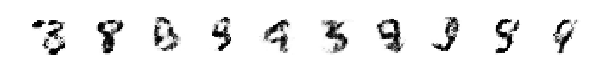

1


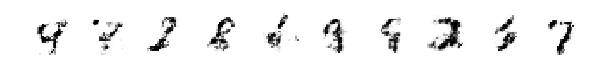

2


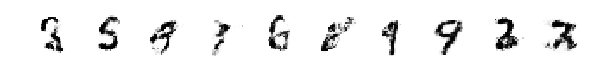

3


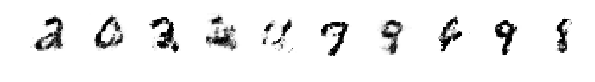

4


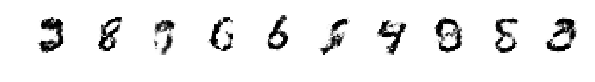

In [28]:
sample_size = 10
print(img_contents.keys())
for epoch_num in img_contents.keys():
    fig , ax = plt.subplots(1,sample_size , figsize = (sample_size , 1))
    print(epoch_num)
    for i in range(sample_size):
        ax[i].set_axis_off()
        ax[i].imshow(np.reshape(img_contents[epoch_num][i] , (28,28)),cmap='Greys')
    plt.show()
    plt.close(fig)